In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV_Files/07_Parameter_Estimation.csv")
sample = np.random.choice(df.Speed, size=10, replace=False)
sample_mean = stat.mean(sample)
population_mean = stat.mean(df.Speed)
print("population_mean:",population_mean,"sample_mean:", sample_mean)

population_mean: 6006.1001141552515 sample_mean: 6347


Sample mean vs population

<ipython-input-5-87e94295e02a>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_calculator(df.Height, 30, 100))
<ipython-input-5-87e94295e02a>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Vehicle Speed', ylabel='Probability'>

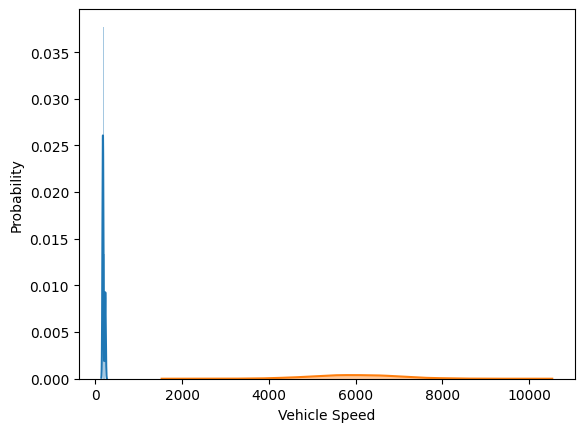

In [5]:
# Book Figure 7-3

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

x = np.random.normal(6000, 1000, size=10000)
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    z = sample_means.append(sample_mean)
    # print(sample_mean)
  return sample_means
sns.distplot(sample_mean_calculator(df.Height, 30, 100))
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')
sns.distplot(x)


Sample Mean Normality Check





In [12]:
# Book Figures 7-5 and 7-6

from scipy.stats import shapiro
print("Mean of Sample Mean:", np.mean(sample_mean_calculator(x, 30, 1000)))
print("Standard Deviation of Sample Mean:", np.std(sample_mean_calculator(x, 30, 1000)))
shapiro(sample_mean_calculator(x, 30, 1000))

Mean of Sample Mean: 6016.70168018141
Standard Deviation of Sample Mean: 192.48851629169715


ShapiroResult(statistic=0.9976770877838135, pvalue=0.17214447259902954)

Distribution fit

Mu: 6006.043822425044 Std: 184.51455824631017


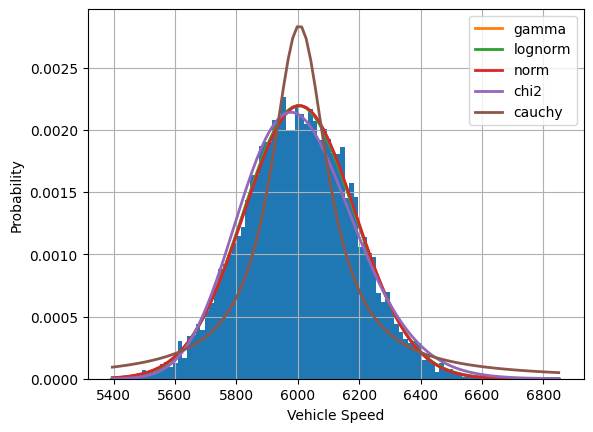

In [ ]:
# Book Figure 7-8
from scipy.stats import norm

# %pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(sample_mean_calculator(x, 30, 10000),
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')

mu, std = norm.fit(sample_mean_calculator(x, 30, 1000))
print('Mu:', mu,'Std:', std)

Skewed distribution check for CLT




<ipython-input-16-77e9cec46bde>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s)


Mean of population: 0.8018425662812284
Standard deviation of population: 0.597363494289275
Mean of sample mean: 0.8040889639405094
Standard deviation of sample mean: 0.11170378487701657


<ipython-input-16-77e9cec46bde>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(sample_mean_calculator(s, 50, 1000))


ShapiroResult(statistic=0.9989250898361206, pvalue=0.8321345448493958)

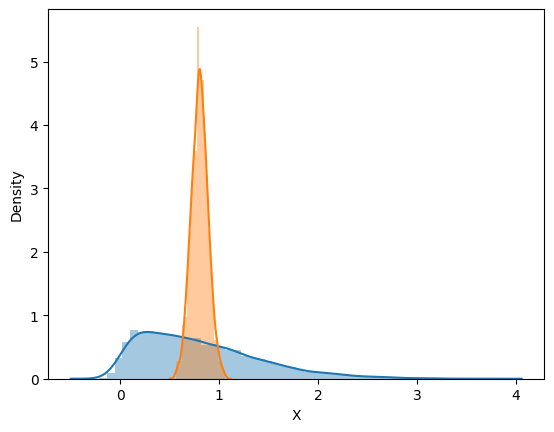

In [16]:
# Book Figure 7-11

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import shapiro

s = skewnorm.rvs(12, size=10000)
sns.distplot(s)
print('Mean of population:', np.mean(s))
print('Standard deviation of population:',np.std(s))
print("Mean of sample mean:", np.mean(sample_mean_calculator(s, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(s, 30, 1000)))
plt.xlabel('X')
_ = sns.distplot(sample_mean_calculator(s, 50, 1000))
shapiro(sample_mean_calculator(s, 50, 1000))

Two-peak distribution check for CLT


<ipython-input-5-cefb93465c5b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(m)


Mean of population: 2.003663289575409
Standard deviation of population: 2.2385150544372934
Mean of sample mean: 2.0218891986719543
Standard deviation of sample mean: 0.39986523373964517


<ipython-input-5-cefb93465c5b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(sample_mean_calculator(m, 30, 1000))


ShapiroResult(statistic=0.9977746605873108, pvalue=0.20060884952545166)

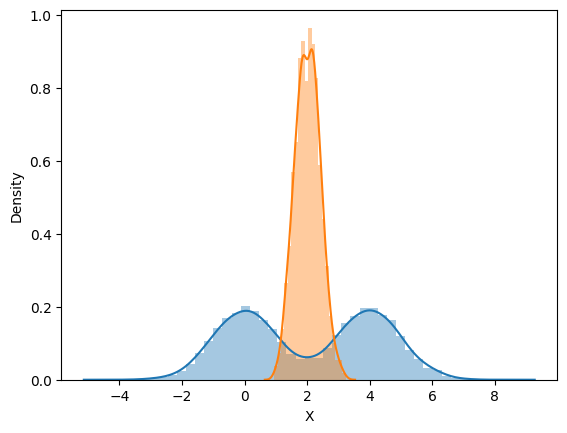

In [ ]:
# Book Figure 7-12

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro

m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))
_ = sns.distplot(m)
print('Mean of population:', np.mean(m))
print('Standard deviation of population:',np.std(m))
print("Mean of sample mean:", np.mean(sample_mean_calculator(m, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(m, 30, 1000)))
plt.xlabel('X')

_ = sns.distplot(sample_mean_calculator(m, 30, 1000))
shapiro(sample_mean_calculator(m, 30, 1000))

CLT application in proabaility calculation

In [21]:
# Book Figure 7-13

import scipy.stats as st
print("Probability of sample mean between +/- 5% of population mean: ", st.norm.cdf(6300,loc=6000,scale=1000/30**0.5)-st.norm.cdf(5700,loc=6000,scale=1000/30**0.5))
print("85 percentile of sample mean : ", st.norm.ppf(0.85,loc=6000,scale=1000/30**0.5))

Probability of sample mean between +/- 5% of population mean:  0.8996517535377093
85 percentile of sample mean :  6189.225982259096


Interval Estimation

In [2]:
from numpy.random.mtrand import RandomState
# Book Figure 7-16

import numpy as np
import scipy.stats as stats
import random
import math

iteration = 1
b=0
population_ages = stats.norm.rvs(30, 50, size=10000)
sample_size = 3

for _ in range(iteration):
  sample = np.random.choice(a= population_ages, size = sample_size)
  sample_mean = sample.mean()
  print("Sample Mean:",sample.mean())

  z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

  print("z-critical value:")              # Check the z-critical value
  print(z_critical)

  pop_stdev = population_ages.std()  # Get the population standard deviation

  margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

  confidence_interval = (sample_mean - margin_of_error,
                        sample_mean + margin_of_error)
  if (sample_mean - margin_of_error)>30 or (sample_mean + margin_of_error)<30:
    b+=1

print("Confidence level:", (iteration-b)/iteration*100)
print("Confidence interval:")
print(confidence_interval)

Sample Mean: 15.756392032343447
z-critical value:
1.6448536269514722
confidence level: 100.0
Confidence interval:
(-32.597373139210596, 64.11015720389749)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
